# Import libraries and data

In this section, we import the necessary libraries and load the data. We will also create a lookup table that stores the relationship between the material, sample number, and the file path to the corresponding CSV file.


In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Specify the parent directory
parent_directory = os.path.expanduser("~/git_repo/materials_comparison/data")

# Create a lookup table (DataFrame) to store the relationship between the material, sample number, and file path
lookup_table = pd.DataFrame(columns=['Material', 'Sample_Number', 'File_Path'])

# Iterate over each material folder in the parent directory
for material_folder in os.listdir(parent_directory):
    material = material_folder.lower()  # Convert to lowercase
    material_path = os.path.join(parent_directory, material_folder)

    # Check if the path is a directory
    if os.path.isdir(material_path):
        # Iterate over each sample folder in the material folder
        for sample_folder in os.listdir(material_path):
            sample_number = sample_folder.replace('Ecoflex', '').lower()  # Convert to lowercase
            sample_path = os.path.join(material_path, sample_folder)

            # Find the CSV file in the sample folder
            for file in os.listdir(sample_path):
                if file.endswith(".csv") and "Data" in file:
                    file_path = os.path.join(sample_path, file)
                    # Append the information to the lookup table
                    row_df = pd.DataFrame([{'Material': material, 'Sample_Number': sample_number, 'File_Path': file_path}])
                    lookup_table = pd.concat([lookup_table, row_df], ignore_index=True)

lookup_table


,Material,Sample_Number,File_Path
0,eco_sil_50x50,014,/home/trevor/git_repo/materials_comparison/dat...
1,eco_sil_50x50,013,/home/trevor/git_repo/materials_comparison/dat...
2,eco_sil_50x50,016,/home/trevor/git_repo/materials_comparison/dat...
3,eco_sil_50x50,015,/home/trevor/git_repo/materials_comparison/dat...
4,ecoflex3x8,004,/home/trevor/git_repo/materials_comparison/dat...
5,ecoflex3x8,001,/home/trevor/git_repo/materials_comparison/dat...
6,ecoflex3x8,003,/home/trevor/git_repo/materials_comparison/dat...
7,ecoflex3x8,002,/home/trevor/git_repo/materials_comparison/dat...
8,ecoflex3x8,005,/home/trevor/git_repo/materials_comparison/dat...
9,ecoflex3x8,006,/home/trevor/git_repo/materials_comparison/dat...


# Process data based on sample number

In this section, we define a function that processes and plots the dataframes for a given material. The function reads in the data for each sample, appends the dataframe to the appropriate group in the groups dictionary, and plots the results.


Plotting the curve for material: eco_dra_50x50, sample number: 008
Plotting the curve for material: eco_dra_50x50, sample number: 010
Plotting the curve for material: eco_dra_50x50, sample number: 009
Plotting the curve for material: eco_dra_50x50, sample number: 011


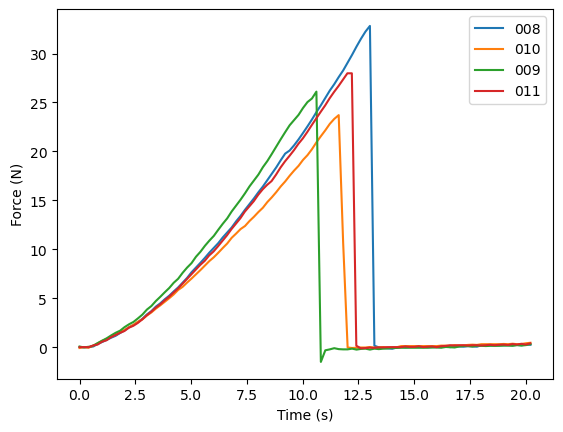

Plotting the curve for material: eco_dra_75x25, sample number: 019
Plotting the curve for material: eco_dra_75x25, sample number: 017
Plotting the curve for material: eco_dra_75x25, sample number: 020
Plotting the curve for material: eco_dra_75x25, sample number: 018


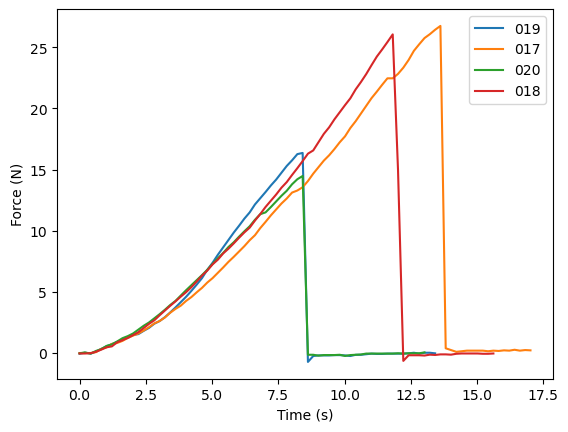

In [32]:
def process_and_plot_dataframes(material, lookup_table):
    # Filter the lookup table for the specific material
    material_data = lookup_table[lookup_table['Material'] == material]

    # Loop over the rows in the filtered lookup table
    for _, row in material_data.iterrows():
        sample_number = row['Sample_Number']
        file_path = row['File_Path']

        df = pd.read_csv(file_path)  # Read in the data
        df.columns = df.columns.str.strip()  # Strip leading and trailing spaces from column names

        # Print a description for the curve
        print(f"Plotting the curve for material: {material}, sample number: {sample_number}")

        plt.plot(np.array(df['Time_S']), np.array(df['Force_N']), label=sample_number)

    plt.xlabel('Time (s)')
    plt.ylabel('Force (N)')
    plt.legend()
    plt.show()

process_and_plot_dataframes('eco_dra_50x50', lookup_table)
process_and_plot_dataframes('eco_dra_75x25', lookup_table)
# And so on for other materials
